# Practice project-5  Titanic Project

In [138]:
import numpy as np
import pandas as pd
import sklearn
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")


# Loading the Data 

In [2]:
import pandas as pd
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S


In [4]:
df=pd.read_csv("titanic_train.csv",index_col=['Name'])
print(df)

                                                    PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen, Mr. William Henry                                      5         0   
...                                                         ...       ...   
Montvila, Rev. Juozas                                       887         0   
Graham, Miss. Margaret Edith                                888         1   
Johnston, Miss. Catherine Helen "Carrie"                    889         0   
Behr, Mr. Karl Howell                                       890         1   
Dooley, Mr. Patrick                                         891         0   

In [5]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


# Understanding the Datasets:

There are 11 columns in the dataset namely:

Name
PassengerId
Survived
Pclass
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked

Name:This column shows name of the pasenger.

PassengerId: It shows Id of all the passenger.

Survived: It shows that the passeger who survived represent by 1 and those who were not represent by 0.It is a categorical feature with 0 or 1 values. 

Pclass : It shows to which class the passenger belongs. Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

Sex: It shows the sex of the passenger.

Age: It shows age of the passenger

Fare: Fares varied significantly with few passengers (<1%) paying as high as .

Ticket: Ticket number, It is a alphanumeric data.

cabin: Cabin number

embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

Few elderly passengers (<1%) within age range 65-80.

sibsp: # of siblings / spouses aboard the Titanic

parch: # of parents / children aboard the Titanic




Some features are mixed data types.

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.




In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Checking the null values

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Cabin has 77.104377 of missing values.

Take care of missing values:
The features cabin have many missing values and so can’t add much value to our analysis. To handle this we will drop it from the dataframe to preserve the integrity of our dataset.

In [9]:
df = df.drop(['Cabin'], axis=1)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Name,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,S


# Checking unique values

In [11]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [12]:
df.loc[df['Age']==" "]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Name,,,,,,,,,,


Handling the Nan values and replacing it with mean of the column. As the column is countinous in nature. 

In [13]:
df['Age']=df['Age'].fillna(np.mean(df['Age']))

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
df.loc[df['Embarked']==" "]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Name,,,,,,,,,,


In [17]:
#df['Embarked']=df['Embarked'].fillna(np.mean(df['Embarked']))

In [18]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

#  First Encoding the data and then replce the nan values with mean

In [19]:
lencoder=LabelEncoder()
df['Embarked']=lencoder.fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Name,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.000000,1,0,A/5 21171,7.2500,2
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.000000,1,0,PC 17599,71.2833,0
"Heikkinen, Miss. Laina",3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,2
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.000000,1,0,113803,53.1000,2
"Allen, Mr. William Henry",5,0,3,male,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.000000,0,0,211536,13.0000,2
"Graham, Miss. Margaret Edith",888,1,1,female,19.000000,0,0,112053,30.0000,2
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,2


In [20]:
df['Embarked']=df['Embarked'].fillna(np.mean(df['Embarked']))

In [21]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int32
dtype: object

In [22]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now no null values is present so then proceed

In [23]:
#encoding remain for sex and ticket

# Making the dataframe for nominal data

In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [25]:
df_visualization_nominal=df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked']].copy()

In [26]:
df_visualization_nominal.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Data Visualization

for Categorical Features we will use count plot it will give frequecy of the classes
Pclass

Survived

Sex

SibSp ( # of siblings and spouse)

Parch ( # of parents and children)

Embarked

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

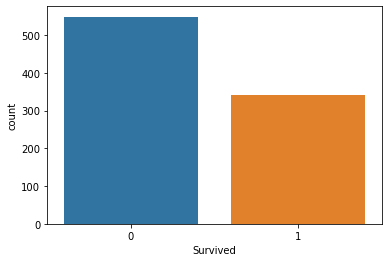

In [27]:
ax=df['Survived'].value_counts()
print(ax)
sns.countplot(df['Survived'])

from the above obserations the total number of people survived are 342 and those who are not survived are 549.

male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

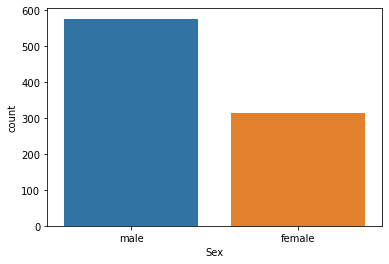

In [28]:
ax=df['Sex'].value_counts()
print(ax)
sns.countplot(df['Sex'])
#print(df_visualization_nominal['Sex'].value.counts())

from the above obserations the total number of male is 577 and female is 314

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

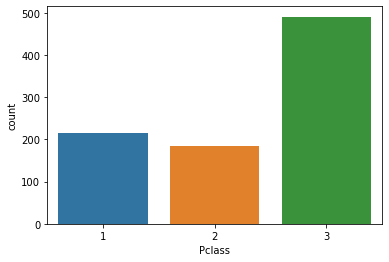

In [29]:
ax=df['Pclass'].value_counts()
print(ax)
sns.countplot(df['Pclass'])

from the above obserations the total number of passenger belongs to Ticket first class is 216 and 2nd class is 184 ,3rd class is 491

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

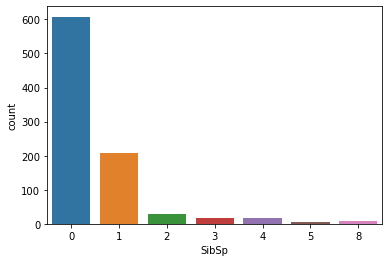

In [30]:
ax=df['SibSp'].value_counts()
print(ax)
sns.countplot(df['SibSp'])

 from the above observation it is showing that a person aboarded with more than 2 siblings or spouse. 
 
0   = 608

1   = 209

2   =  28

4   = 18

3     16

8      7

5      5

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<AxesSubplot:xlabel='Parch', ylabel='count'>

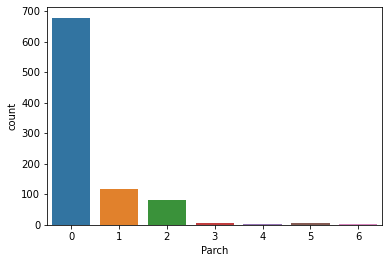

In [31]:
ax=df['Parch'].value_counts()
print(ax)
sns.countplot(df['Parch'])

from the above observation it is observed that person aboarded with  2 parents or children.

0   = 678

1   = 118

2    = 80

5    = 5

3    = 5

4    = 4

6    = 1

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

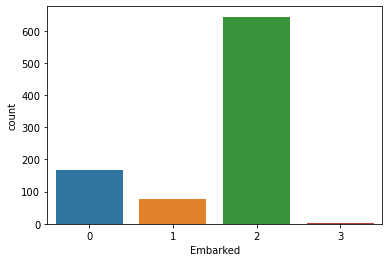

In [32]:
ax=df['Embarked'].value_counts()
print(ax)
sns.countplot(df['Embarked'])

from the above observation it is observed that 

person aboarded from 0 are 168

a person aboarded from 1 are 77

a person aboarded from 2 are 644

a person aboarded from 3 are 2

# Encoding  of sex and ticket column

In [33]:
lencoder=LabelEncoder()
df['Sex']=lencoder.fit_transform(df['Sex'])
df['Ticket']=lencoder.fit_transform(df['Ticket'])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Name,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,1,22.000000,1,0,523,7.2500,2
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,0,38.000000,1,0,596,71.2833,0
"Heikkinen, Miss. Laina",3,1,3,0,26.000000,0,0,669,7.9250,2
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,0,35.000000,1,0,49,53.1000,2
"Allen, Mr. William Henry",5,0,3,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,1,27.000000,0,0,101,13.0000,2
"Graham, Miss. Margaret Edith",888,1,1,0,19.000000,0,0,14,30.0000,2
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,0,29.699118,1,2,675,23.4500,2


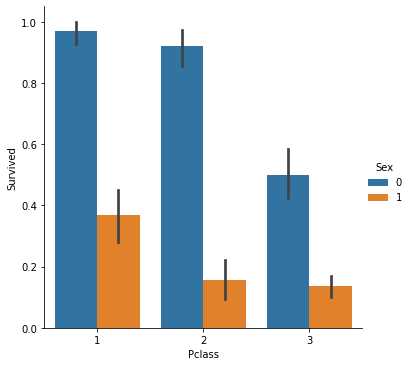

In [34]:
g=sns.catplot(x='Pclass',y='Survived',hue='Sex',data=df,kind='bar')
plt.show()

From the above plot it shows that male passenger are survived more than female passenger

0 ---> Male

1----> Female

In [35]:
#sns.catplot?

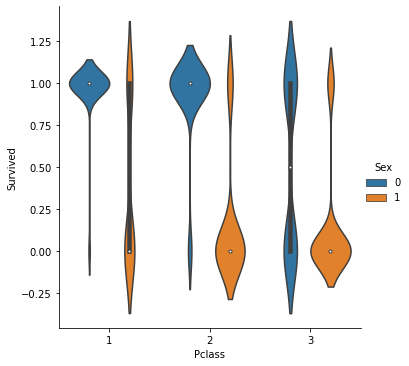

In [36]:
g=sns.catplot(x='Pclass',y='Survived',hue='Sex',data=df,kind='violin')
plt.show()

From the above plot it shows that male passenger are survived more than female passenger

0 ---> Male

1----> Female

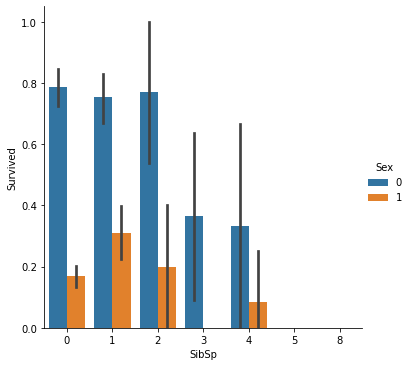

In [37]:
g=sns.catplot(x='SibSp',y='Survived',hue='Sex',data=df,kind='bar')
plt.show()

from the above plot it is observed that male sibling survived more than female sibling.

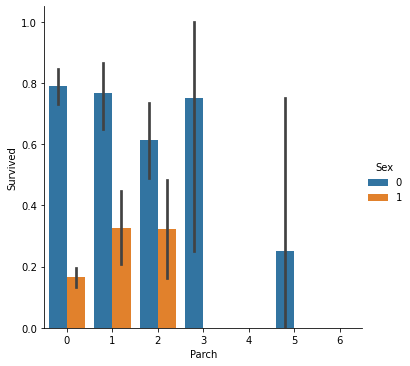

In [38]:
g=sns.catplot(x='Parch',y='Survived',hue='Sex',data=df,kind='bar')
plt.show()

from the above plot it is observed that male passenger having parent or child are survived more than female passenger.

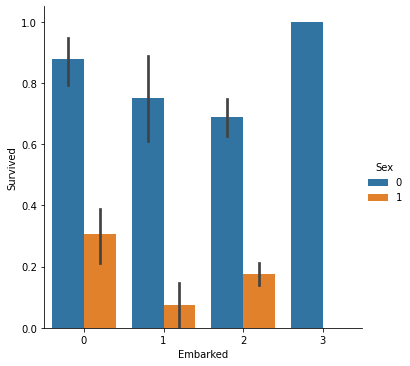

In [39]:
g=sns.catplot(x='Embarked',y='Survived',hue='Sex',data=df,kind='bar')
plt.show()

from the above observation it is observed that

person aboarded from 0 are both male and female and in it male passenger survived more than female.

a person aboarded from 1 are both male and female and in it male passenger survived more than female.

a person aboarded from 2 are both male and female and in it male passenger survived more than female.

a person aboarded from 3 are only male passenger and all are survived.



<AxesSubplot:xlabel='Age', ylabel='Density'>

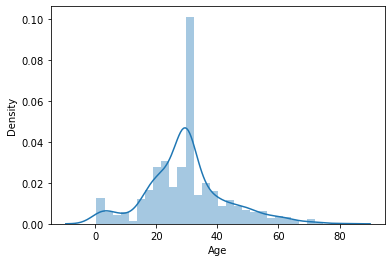

In [40]:
sns.distplot(df['Age'],kde=True)

from the above plot it observed that passenger belongs to age 0 means from infant to the age 80 years and 32-33 age persons are more in number.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

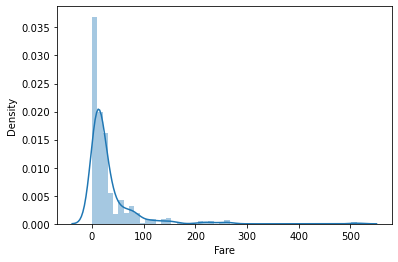

In [41]:
sns.distplot(df['Fare'],kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

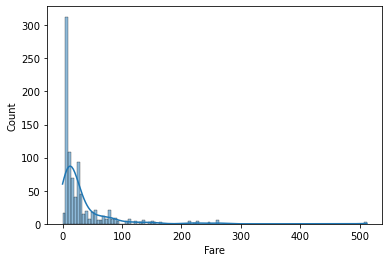

In [42]:
sns.histplot(df['Fare'],kde=True)

It is observed that maximum fare ranges from 0 to 20

<AxesSubplot:xlabel='Ticket', ylabel='Count'>

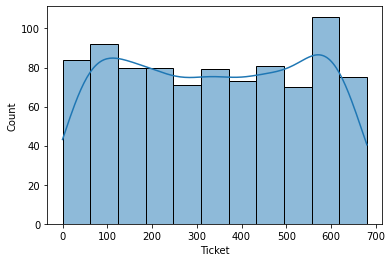

In [43]:
sns.histplot(df['Ticket'],kde=True)

It is observed that ticket ranges from 0 to 700

# Describe the dataset

In [44]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,3.000000


<AxesSubplot:>

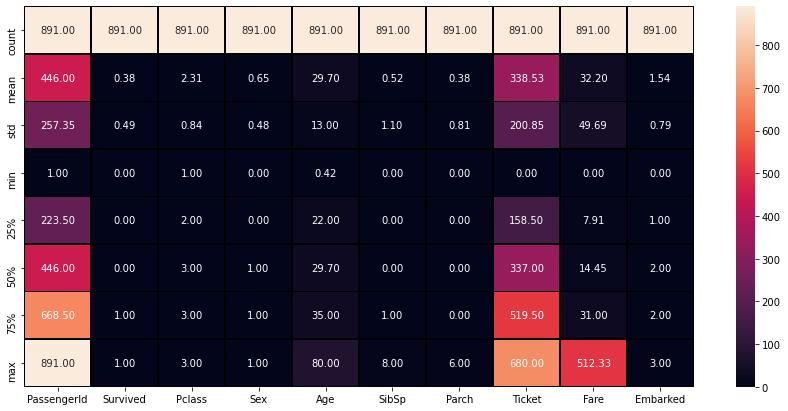

In [45]:
plt.figure(figsize=(15,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


From the above plotting we are determining mean, standard deviation, minimum and maximum value of each column. It helps us further in data cleaning.

PassengerId:

Mean=446
std=257
max_value=891
min_value=1

Pclass:

Mean=2.3086
std=0.8360
max_value=1
min_value=3

Sex:

Mean=0.6475
std=0.47790
max_value=1
min_value=0

Age:

Mean=29.6991
std=13.002015
max_value=80
min_value=0.42

SibSp:

Mean=0.523008
std=1.102743
max_value=8
min_value=0

Parch:

Mean=0.381594
std=0.808657
max_value=6
min_value=0

Ticket:

Mean=338.52862
std=200.850657
max_value=680
min_value=0

Fare:

Mean=32.204208
std=49.693429
max_value=512.329200
min_value=0

Embarked:

Mean=1.538721
std=0.794231
max_value=3
min_value=0

# Correlation of the columns with the target columns

In [46]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.157112
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.104057
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.022239
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.066654
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.038322
Ticket,-0.056554,-0.164549,0.319869,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.006041
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.221226
Embarked,0.013083,-0.163517,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.006041,-0.221226,1.000000


<AxesSubplot:>

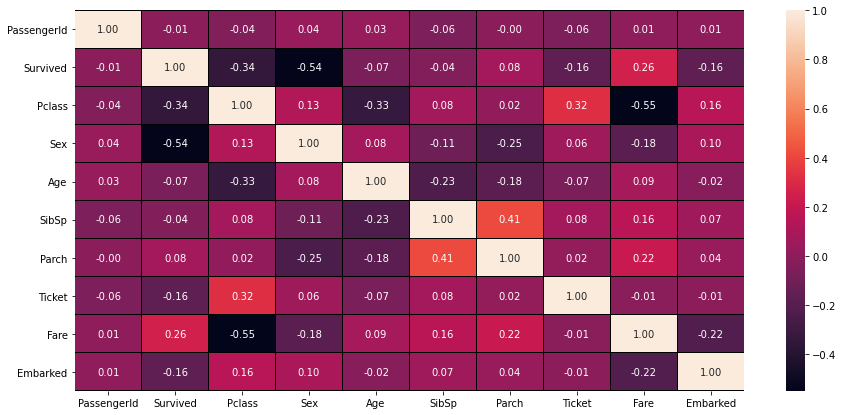

In [47]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


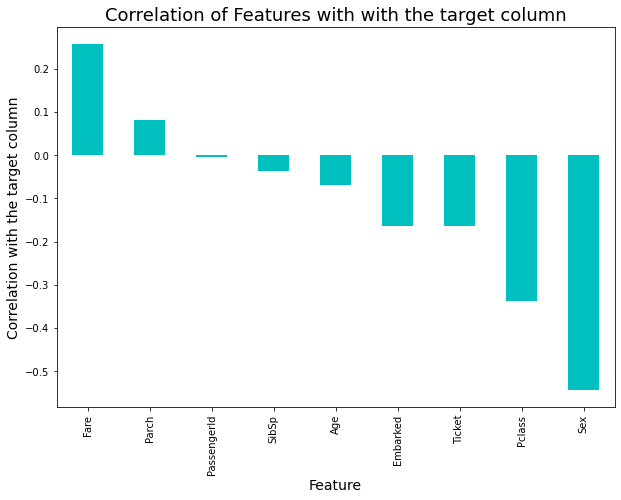

In [48]:
plt.figure(figsize=(10,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()


# Now we use subplot and displot to check data are normalised or not.

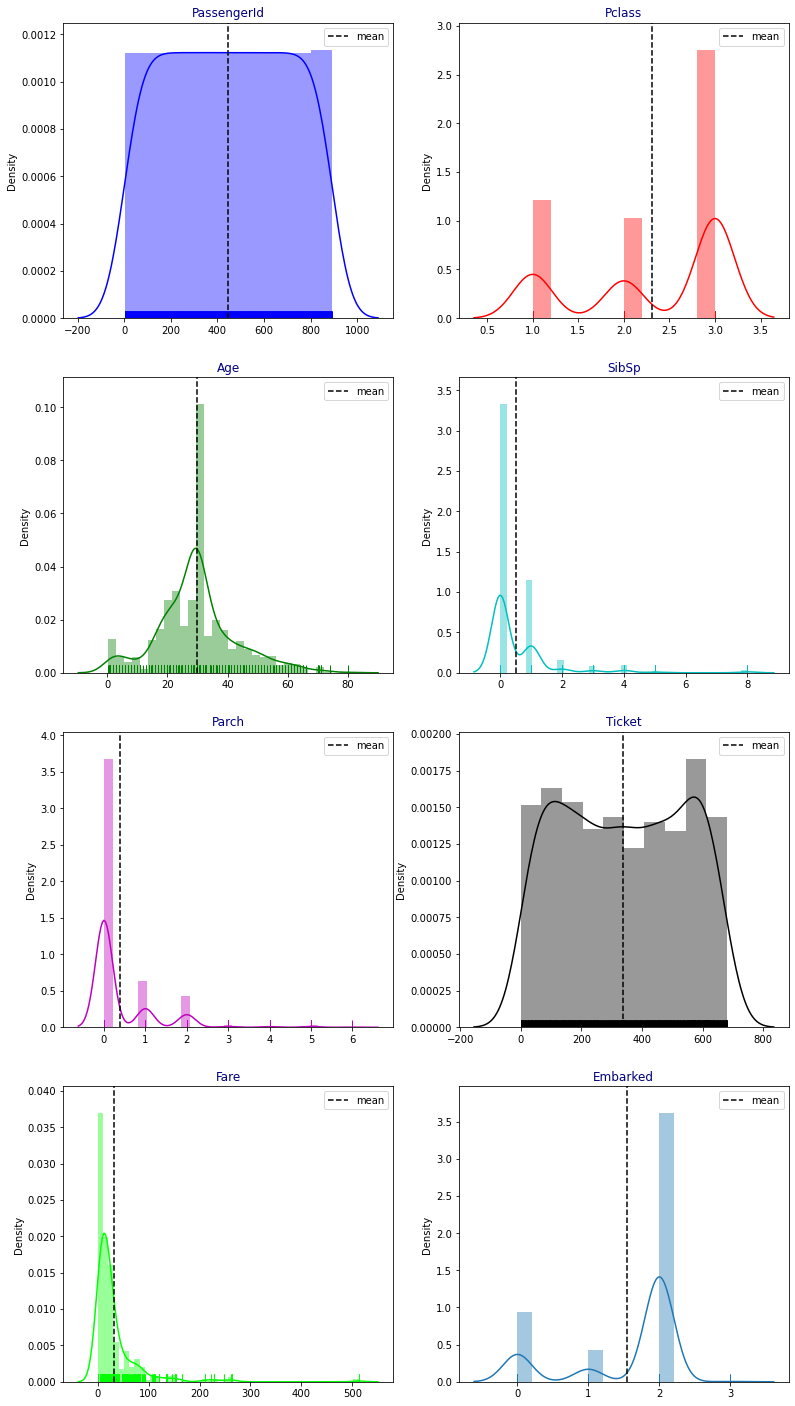

In [49]:
import itertools

cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked']
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")


From the above observation, it is clear that the data are not normalised and we should proceed with the data cleaning method.

In [50]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Embarked      -1.246689
dtype: float64

From the above observation the columns falls under high skewness:

Pclass --> -0.630548 
Sex   --> -0.618921 
    
SibSp  -->        3.695352
Parch  -->        2.749117
Ticket  -->       0.000246
Fare   -->        4.787317
Embarked -->      -1.246689

But the columns have good correlation with the target column and  Pclass, Sex ,SibSp ,Parch, Embarked are categorical data  hence dropping of such column should not be good approach.

No need to remove skewness.

# Outliers Check:

<AxesSubplot:>

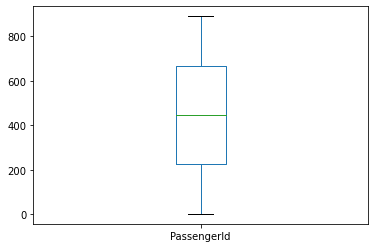

In [51]:
df['PassengerId'].plot.box()

<AxesSubplot:>

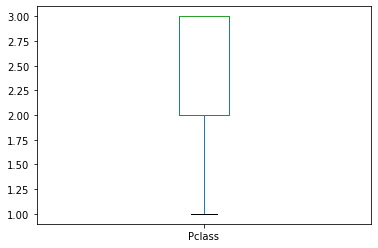

In [52]:
df['Pclass'].plot.box()

<AxesSubplot:>

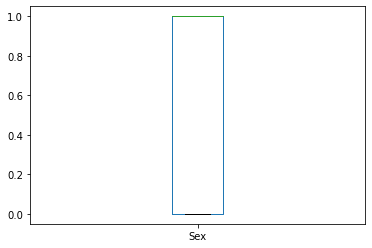

In [53]:
df['Sex'].plot.box()

<AxesSubplot:>

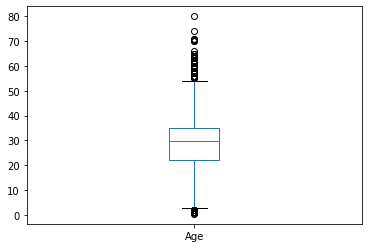

In [54]:
df['Age'].plot.box()

<AxesSubplot:>

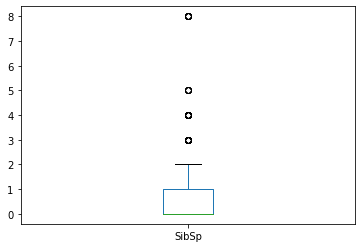

In [55]:
df['SibSp'].plot.box()

<AxesSubplot:>

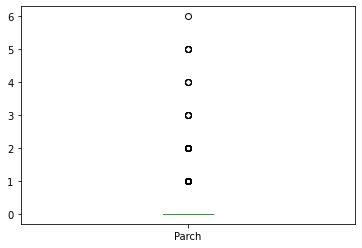

In [56]:
df['Parch'].plot.box()

<AxesSubplot:>

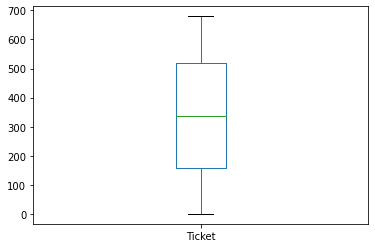

In [57]:
df['Ticket'].plot.box()

<AxesSubplot:>

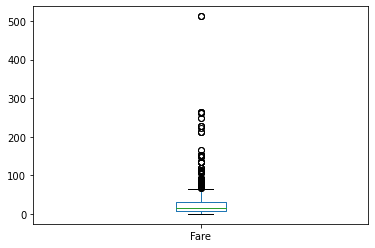

In [58]:
df['Fare'].plot.box()

<AxesSubplot:>

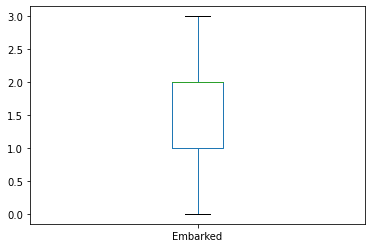

In [59]:
df['Embarked'].plot.box()

from the above plot it is observed that some outliers are present.

# Outliers Removal

In [60]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([6, 5, 6, 8, 5, 5, 5, 5, 6, 8, 4, 4, 8, 5, 5, 5, 6, 5, 5, 5, 5, 5,
        8, 5, 5, 5, 8, 8, 5, 8, 6, 8, 8, 5, 6, 6, 8, 5, 4, 8, 5, 5, 8, 6,
        6, 4, 6, 4, 6, 8, 5, 5, 8, 8, 8, 8, 6, 8, 8, 4, 6, 8, 5, 5, 5, 5,
        5, 5, 4, 6, 5, 6], dtype=int64))

In [61]:
df_new=df[(z<3).all(axis=1)]
df_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Name,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,1,22.000000,1,0,523,7.2500,2
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,0,38.000000,1,0,596,71.2833,0
"Heikkinen, Miss. Laina",3,1,3,0,26.000000,0,0,669,7.9250,2
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,0,35.000000,1,0,49,53.1000,2
"Allen, Mr. William Henry",5,0,3,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,1,27.000000,0,0,101,13.0000,2
"Graham, Miss. Margaret Edith",888,1,1,0,19.000000,0,0,14,30.0000,2
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,0,29.699118,1,2,675,23.4500,2


In [62]:
df.shape

(891, 10)

# Percentage loss of data

In [63]:
percentage_loss=((891-820)/891)*100
print(percentage_loss)

7.968574635241302


# Sparating the target and feature column

In [64]:
feature=df.drop("Survived",axis=1)
target=df["Survived"]
#x=df_new.iloc[:,:-1]

#y=df_new.iloc[:,-1]

# Scaling the data using the min max scaler

In [65]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = mms.fit_transform(feature)
x

array([[0.        , 1.        , 1.        , ..., 0.76911765, 0.01415106,
        0.66666667],
       [0.0011236 , 0.        , 0.        , ..., 0.87647059, 0.13913574,
        0.        ],
       [0.00224719, 1.        , 0.        , ..., 0.98382353, 0.01546857,
        0.66666667],
       ...,
       [0.99775281, 1.        , 0.        , ..., 0.99264706, 0.04577135,
        0.66666667],
       [0.9988764 , 0.        , 1.        , ..., 0.01176471, 0.0585561 ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.68529412, 0.01512699,
        0.33333333]])

In [66]:
y=target
y

Name
Braund, Mr. Owen Harris                                0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               0
                                                      ..
Montvila, Rev. Juozas                                  0
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               0
Behr, Mr. Karl Howell                                  1
Dooley, Mr. Patrick                                    0
Name: Survived, Length: 891, dtype: int64

# Logistic Regression

In [140]:
lr=LogisticRegression()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    lr.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training r2_score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing r2_score is:-",accuracy_score(y_test,pred_test)*100)

At random state 178 The model performs very well
At random state:- 178
Training r2_score is:- 79.91573033707866
Testing r2_score is:- 79.88826815642457
At random state 191 The model performs very well
At random state:- 191
Training r2_score is:- 81.03932584269663
Testing r2_score is:- 81.00558659217877
At random state 308 The model performs very well
At random state:- 308
Training r2_score is:- 81.03932584269663
Testing r2_score is:- 81.00558659217877
At random state 449 The model performs very well
At random state:- 449
Training r2_score is:- 81.03932584269663
Testing r2_score is:- 81.00558659217877
At random state 457 The model performs very well
At random state:- 457
Training r2_score is:- 81.03932584269663
Testing r2_score is:- 81.00558659217877
At random state 473 The model performs very well
At random state:- 473
Training r2_score is:- 79.91573033707866
Testing r2_score is:- 79.88826815642457
At random state 563 The model performs very well
At random state:- 563
Training r2_score

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=191,test_size=0.20)

In [148]:
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[81 31]
 [53 14]]
              precision    recall  f1-score   support

           0       0.60      0.72      0.66       112
           1       0.31      0.21      0.25        67

    accuracy                           0.53       179
   macro avg       0.46      0.47      0.45       179
weighted avg       0.49      0.53      0.51       179



# Cross validation for logistic regression

In [152]:
from sklearn.model_selection import cross_val_score
pred_lr = lr.predict(x_test)

lrcs= accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lrscore = cross_val_score(lr,x,y,cv=j)
    lrc = lrscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lrc*100 )
    print("accuracy_score is :-",lrcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 78.00196503249862
accuracy_score is :- 81.00558659217877


At cv:- 3
Cross validation score is:- 79.57351290684626
accuracy_score is :- 81.00558659217877


At cv:- 4
Cross validation score is:- 79.9110208863572
accuracy_score is :- 81.00558659217877


At cv:- 5
Cross validation score is:- 79.79787835038603
accuracy_score is :- 81.00558659217877


At cv:- 6
Cross validation score is:- 79.90734022613218
accuracy_score is :- 81.00558659217877


At cv:- 7
Cross validation score is:- 79.79734955005624
accuracy_score is :- 81.00558659217877


At cv:- 8
Cross validation score is:- 79.90870334620335
accuracy_score is :- 81.00558659217877


At cv:- 9
Cross validation score is:- 79.57351290684623
accuracy_score is :- 81.00558659217877




In [145]:
print("At cv:-",4)
print("Cross validation score is:-",79.911 )
print("Accuracy_score is :-",81.000)

At cv:- 4
Cross validation score is:- 79.911
Accuracy_score is :- 81.0


# AUC-ROC curve

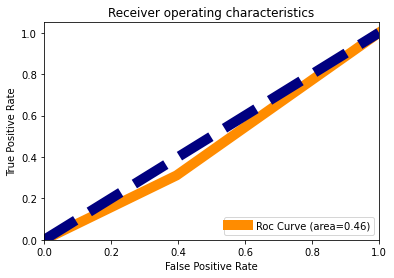

In [153]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [154]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))

In [155]:
print(auc_score)

0.7912446695095949


# Classification model buliding

In [67]:
mnb=MultinomialNB()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    mnb.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=mnb.predict(x_train)
    pred_test=mnb.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 340 The model performs very well
At random state:- 340
Training score is:- 70.36516853932584
Testing score is:- 70.39106145251397
At random state 438 The model performs very well
At random state:- 438
Training score is:- 68.67977528089888
Testing score is:- 68.71508379888269
At random state 522 The model performs very well
At random state:- 522
Training score is:- 68.67977528089888
Testing score is:- 68.71508379888269
At random state 526 The model performs very well
At random state:- 526
Training score is:- 67.5561797752809
Testing score is:- 67.59776536312849
At random state 553 The model performs very well
At random state:- 553
Training score is:- 68.67977528089888
Testing score is:- 68.71508379888269
At random state 694 The model performs very well
At random state:- 694
Training score is:- 67.5561797752809
Testing score is:- 67.59776536312849
At random state 918 The model performs very well
At random state:- 918
Training score is:- 69.80337078651685
Testing score is:

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=340,test_size=0.20)

In [115]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
pred_test=mnb.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.6089385474860335
[[97  4]
 [66 12]]
              precision    recall  f1-score   support

           0       0.60      0.96      0.73       101
           1       0.75      0.15      0.26        78

    accuracy                           0.61       179
   macro avg       0.67      0.56      0.50       179
weighted avg       0.66      0.61      0.53       179



# Cross-validation for MultinomialNB

In [126]:
from sklearn.model_selection import cross_val_score
pred_mnb = mnb.predict(x_test)

mnbcs= accuracy_score(y_test,pred_mnb)
for j in range(2,10):
    mnbscore = cross_val_score(mnb,x,y,cv=j)
    mnbc = mnbscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",mnbc*100 )
    print("accuracy_score is :-",mnbcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 70.59983876656422
accuracy_score is :- 60.893854748603346


At cv:- 3
Cross validation score is:- 69.47250280583614
accuracy_score is :- 60.893854748603346


At cv:- 4
Cross validation score is:- 68.80630630630631
accuracy_score is :- 60.893854748603346


At cv:- 5
Cross validation score is:- 68.91783315548301
accuracy_score is :- 60.893854748603346


At cv:- 6
Cross validation score is:- 68.92194207630449
accuracy_score is :- 60.893854748603346


At cv:- 7
Cross validation score is:- 68.92136529808775
accuracy_score is :- 60.893854748603346


At cv:- 8
Cross validation score is:- 68.6967101029601
accuracy_score is :- 60.893854748603346


At cv:- 9
Cross validation score is:- 68.68686868686868
accuracy_score is :- 60.893854748603346




In [71]:
print("At cv:-",2)
print("Cross validation score is:-",70.599 )
print("Accuracy_score is :-",70.391)

At cv:- 2
Cross validation score is:- 70.599
Accuracy_score is :- 70.391


The value of cv should be 2.

# Auc Roc Curve

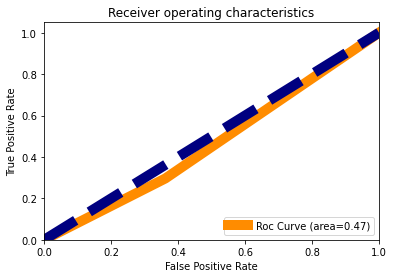

In [72]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [73]:
svc=SVC(kernel='rbf')
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    svc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 27 The model performs very well
At random state:- 27
Training score is:- 81.03932584269663
Testing score is:- 81.00558659217877
At random state 153 The model performs very well
At random state:- 153
Training score is:- 81.60112359550563
Testing score is:- 81.56424581005587
At random state 246 The model performs very well
At random state:- 246
Training score is:- 81.03932584269663
Testing score is:- 81.00558659217877
At random state 388 The model performs very well
At random state:- 388
Training score is:- 81.60112359550563
Testing score is:- 81.56424581005587
At random state 586 The model performs very well
At random state:- 586
Training score is:- 81.60112359550563
Testing score is:- 81.56424581005587
At random state 637 The model performs very well
At random state:- 637
Training score is:- 81.60112359550563
Testing score is:- 81.56424581005587
At random state 769 The model performs very well
At random state:- 769
Training score is:- 81.60112359550563
Testing score is:

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=153,test_size=0.20)

In [75]:
def svmkernel(ker):
    svc=SVC(kernel=ker)  
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    pred_test=svc.predict(x_test)
    print(accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))


In [76]:
svmkernel('rbf')

0.8156424581005587
[[100  15]
 [ 18  46]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       115
           1       0.75      0.72      0.74        64

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



# Cross-validation for SVM for rbf kernel

In [77]:
from sklearn.model_selection import cross_val_score
pred_svc = svc.predict(x_test)

svccs= accuracy_score(y_test,pred_svc)
for j in range(2,10):
    svcscore = cross_val_score(svc,x,y,cv=j)
    svcc = svcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",svcc*100 )
    print("accuracy_score is :-",svccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 80.35924824910565
accuracy_score is :- 82.68156424581005


At cv:- 3
Cross validation score is:- 81.03254769921436
accuracy_score is :- 82.68156424581005


At cv:- 4
Cross validation score is:- 80.69678422817435
accuracy_score is :- 82.68156424581005


At cv:- 5
Cross validation score is:- 80.58376749733226
accuracy_score is :- 82.68156424581005


At cv:- 6
Cross validation score is:- 80.13407703005018
accuracy_score is :- 82.68156424581005


At cv:- 7
Cross validation score is:- 80.24817210348706
accuracy_score is :- 82.68156424581005


At cv:- 8
Cross validation score is:- 79.90970881595881
accuracy_score is :- 82.68156424581005


At cv:- 9
Cross validation score is:- 79.685746352413
accuracy_score is :- 82.68156424581005




In [78]:
print("At cv:-",3)
print("Cross validation score is:-",81.032)
print("Accuracy_score is :-",82.681)

At cv:- 3
Cross validation score is:- 81.032
Accuracy_score is :- 82.681


In [79]:


svc=SVC(kernel='linear')
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    svc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 660 The model performs very well
At random state:- 660
Training score is:- 78.79213483146067
Testing score is:- 78.77094972067039


In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=660,test_size=0.20)

print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.5307262569832403
[[77 30]
 [54 18]]
              precision    recall  f1-score   support

           0       0.59      0.72      0.65       107
           1       0.38      0.25      0.30        72

    accuracy                           0.53       179
   macro avg       0.48      0.48      0.47       179
weighted avg       0.50      0.53      0.51       179



# Cross-validation for SVM for linear kernel

In [81]:
from sklearn.model_selection import cross_val_score
pred_svc = svc.predict(x_test)

svccs= accuracy_score(y_test,pred_svc)
for j in range(2,10):
    svcscore = cross_val_score(svc,x,y,cv=j)
    svcc = svcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",svcc*100 )
    print("accuracy_score is :-",svccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 78.44963974404192
accuracy_score is :- 78.77094972067039


At cv:- 3
Cross validation score is:- 78.67564534231201
accuracy_score is :- 78.77094972067039


At cv:- 4
Cross validation score is:- 78.6748070940896
accuracy_score is :- 78.77094972067039


At cv:- 5
Cross validation score is:- 78.67365513778168
accuracy_score is :- 78.77094972067039


At cv:- 6
Cross validation score is:- 78.67011306608622
accuracy_score is :- 78.77094972067039


At cv:- 7
Cross validation score is:- 78.67336895388077
accuracy_score is :- 78.77094972067039


At cv:- 8
Cross validation score is:- 78.6699646074646
accuracy_score is :- 78.77094972067039


At cv:- 9
Cross validation score is:- 78.67564534231201
accuracy_score is :- 78.77094972067039




In [82]:
print("At cv:-",3)
print("Cross validation score is:-",78.675)
print("Accuracy_score is :-", 78.770)

At cv:- 3
Cross validation score is:- 78.675
Accuracy_score is :- 78.77


In [83]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train,y_train)
GridSearchCV(estimator=SVC(),param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf.cv_results_.keys())



print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [127]:
###
svcr = SVC(C=10, kernel='rbf')
svcr.fit(x_train,y_train)
svcr.score(x_train,y_train)
pred_svcr = svcr.predict(x_test)

svcsr = accuracy_score(y_test,pred_svcr)
print('Accuracy Score:',svcsr*100)

svcrscore = cross_val_score(svcr,x,y,cv=3)
svccr = svcrscore.mean() 
print('Cross Val Score:',svccr*100)

Accuracy Score: 82.68156424581005
Cross Val Score: 81.25701459034792


# Auc roc curve for SVM with 'rbf' kernel

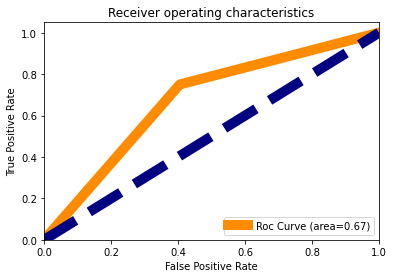

In [117]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [85]:
dtc=DecisionTreeClassifier()
for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    dtc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=dtc.predict(x_train)
    pred_test=dtc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [86]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=0.20)

In [87]:
dtc=DecisionTreeClassifier() 
dtc.fit(x_train,y_train)

dtc.score(x_train,y_train)
pred_test=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7486033519553073
1.0
[[88 20]
 [25 46]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       108
           1       0.70      0.65      0.67        71

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179



Here the model is overfitting as training accuracy is greater than testing accuracy.

Cross validation of DTC model

In [130]:
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier() 
#pred_dtc = dtc.predict(x_test)
dtccs= accuracy_score(y_test,pred_test)
for j in range(2,10):
    dtcscore = cross_val_score(dtc,x,y,cv=j)
    dtcc = dtcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",dtcc*100 )
    print("accuracy_score is :-",dtccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 60.848994810298784
accuracy_score is :- 84.35754189944134


At cv:- 3
Cross validation score is:- 65.4320987654321
accuracy_score is :- 84.35754189944134


At cv:- 4
Cross validation score is:- 74.86415787985295
accuracy_score is :- 84.35754189944134


At cv:- 5
Cross validation score is:- 73.53210721235325
accuracy_score is :- 84.35754189944134


At cv:- 6
Cross validation score is:- 67.81773384122377
accuracy_score is :- 84.35754189944134


At cv:- 7
Cross validation score is:- 75.54749015748031
accuracy_score is :- 84.35754189944134


At cv:- 8
Cross validation score is:- 72.05296814671814
accuracy_score is :- 84.35754189944134


At cv:- 9
Cross validation score is:- 72.27833894500561
accuracy_score is :- 84.35754189944134




In [112]:
print("At cv:-",4)
print("Cross validation score is:-",74.752)
print("Accuracy_score is :-", 84.357)

At cv:- 4
Cross validation score is:- 74.752
Accuracy_score is :- 84.357


In [103]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier() 
params ={"criterion":['gini','entropy'],"max_depth":range(1,10), "min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}
                
grid = GridSearchCV(dtc, param_grid = params, cv=4,verbose=1,n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)

print("Best parameters are: ",grid.best_params_)

print("Accuracy score: ",grid.best_score_)

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
DecisionTreeClassifier(criterion='entropy', max_depth=4)
Best parameters are:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy score:  0.8202247191011236


In [105]:
knn=KNeighborsClassifier(n_neighbors=5)
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    knn.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 507 The model performs very well
At random state:- 507
Training score is:- 84.41011235955057
Testing score is:- 84.35754189944134
At random state 537 The model performs very well
At random state:- 537
Training score is:- 82.7247191011236
Testing score is:- 82.68156424581005


In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=507,test_size=0.20)

In [120]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_test=knn.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.8435754189944135
[[95  6]
 [22 56]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       101
           1       0.90      0.72      0.80        78

    accuracy                           0.84       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.85      0.84      0.84       179



In [122]:
knn=KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
knncs= accuracy_score(y_test,pred_knn)
for j in range(2,10):
    knnscore = cross_val_score(knn,x,y,cv=j)
    knnc = knnscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",knnc*100 )
    print("accuracy_score is :-",knncs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 77.55504610268554
accuracy_score is :- 84.35754189944134


At cv:- 3
Cross validation score is:- 79.68574635241302
accuracy_score is :- 84.35754189944134


At cv:- 4
Cross validation score is:- 78.90154728719752
accuracy_score is :- 84.35754189944134


At cv:- 5
Cross validation score is:- 78.67553825874081
accuracy_score is :- 84.35754189944134


At cv:- 6
Cross validation score is:- 78.78499304673801
accuracy_score is :- 84.35754189944134


At cv:- 7
Cross validation score is:- 78.22606158605174
accuracy_score is :- 84.35754189944134


At cv:- 8
Cross validation score is:- 79.00880791505791
accuracy_score is :- 84.35754189944134


At cv:- 9
Cross validation score is:- 78.78787878787877
accuracy_score is :- 84.35754189944134




In [114]:
print("At cv:-",3)
print("Cross validation score is:-",79.685)
print("Accuracy_score is :-", 84.357)

At cv:- 3
Cross validation score is:- 79.685
Accuracy_score is :- 84.357


In [131]:
from sklearn.metrics import f1_score
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='macro')
knn_f1=f1_score(y_true, pred_knn, average='macro')
svcr_f1=f1_score(y_true, pred_svcr, average='macro')
mnb_f1=f1_score(y_true, pred_mnb, average='macro')

print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)
print("svcr f1 score",svcr_f1)
print("mnb f1 score",mnb_f1)

dtc f1 score 0.8357798165137615
knn f1 score 0.8357798165137615
svcr f1 score 0.815678458727786
mnb f1 score 0.4950838168923275


In [132]:
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='weighted')
knn_f1=f1_score(y_true, pred_knn, average='weighted')
svcr_f1=f1_score(y_true, pred_svcr, average='weighted')
mnb_f1=f1_score(y_true, pred_mnb, average='weighted')

print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)
print("svcr f1 score",svcr_f1)
print("mnb f1 score",mnb_f1)

dtc f1 score 0.8403772231049151
knn f1 score 0.8403772231049151
svcr f1 score 0.8215001684049958
mnb f1 score 0.5258915675235656


# The best model is SVM classifier with rbf kernel. Since the difference between the percentage score of cross validation and accuracy_score is optimum and f1 score is also good in all other model.

Accuracy Score: 82.68156424581005
Cross Val Score: 81.25701459034792

# Model Saving

In [133]:
import pickle
filename = 'inhouse_titanic.pkl'
pickle.dump(svcr, open(filename, 'wb'))

# Conclusion

In [134]:
import numpy as np
a=np.array(y_test)
a

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0], dtype=int64)

In [135]:
predicted=np.array(svcr.predict(x_test))
predicted

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [136]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
174,1,1
175,0,0
176,1,0
177,0,0


# From the above table the model is predicted the values with 80 percent accuracy